In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
instagram_df_train = pd.read_csv('train.csv')

In [3]:
instagram_df_test = pd.read_csv('test.csv')

In [4]:
X_train = instagram_df_train.drop(columns=['fake'])
X_test = instagram_df_test.drop(columns=['fake'])

In [5]:
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']

In [6]:
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [7]:
model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, verbose=1)

Epoch 1/50


17/17 [==============================] - 1s 15ms/step - loss: 0.5796 - accuracy: 0.7432 - val_loss: 0.4639 - val_accuracy: 0.7931
Epoch 2/50
17/17 [==============================] - 0s 5ms/step - loss: 0.3629 - accuracy: 0.8803 - val_loss: 0.2052 - val_accuracy: 0.9138
Epoch 3/50
17/17 [==============================] - 0s 4ms/step - loss: 0.2815 - accuracy: 0.8900 - val_loss: 0.1494 - val_accuracy: 0.9310
Epoch 4/50
17/17 [==============================] - 0s 4ms/step - loss: 0.2611 - accuracy: 0.9112 - val_loss: 0.1497 - val_accuracy: 0.9138
Epoch 5/50
17/17 [==============================] - 0s 3ms/step - loss: 0.2442 - accuracy: 0.9112 - val_loss: 0.1484 - val_accuracy: 0.9138
Epoch 6/50
17/17 [==============================] - 0s 3ms/step - loss: 0.2484 - accuracy: 0.9035 - val_loss: 0.1701 - val_accuracy: 0.9138
Epoch 7/50
17/17 [==============================] - 0s 3ms/step - loss: 0.2408 - accuracy: 0.9112 - val_loss: 0.1734 - val_accuracy: 0.9138
Epoch 8/50
17/17 

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


4/4 [==============================] - 0s 3ms/step - loss: 0.4513 - accuracy: 0.8750
Test Loss: 0.45132097601890564
Test Accuracy: 0.875


In [11]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

4/4 [==============================] - 0s 2ms/step


In [12]:
threshold = 0.6 

In [13]:
scores = predictions[:, 1]  # Probability of being fake
suspicious_indices = np.where(scores > threshold)[0]

In [14]:
print("Suspicious Indices:", suspicious_indices)

Suspicious Indices: [  0   4  20  28  40  50  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  83  84  85  87  88  89  91  92
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 112 113 114
 115 116 118 119]


In [16]:
instagram_df_test['suspicious'] = 'No'
instagram_df_test.loc[suspicious_indices, 'suspicious'] = 'Yes'

In [17]:
print(instagram_df_test)

     profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.33               1                  0.33   
1              1                  0.00               5                  0.00   
2              1                  0.00               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.50               1                  0.00   
..           ...                   ...             ...                   ...   
115            1                  0.29               1                  0.00   
116            1                  0.40               1                  0.00   
117            1                  0.00               2                  0.00   
118            0                  0.17               1                  0.00   
119            1                  0.44               1                  0.00   

     name==username  description length

In [18]:
fake_percentage = (len(suspicious_indices) / len(instagram_df_test)) * 100
not_fake_percentage = 100 - fake_percentage

In [19]:
print("Percentage of profiles considered fake:", fake_percentage, "%")
print("Percentage of profiles considered not fake:", not_fake_percentage, "%")

Percentage of profiles considered fake: 48.333333333333336 %
Percentage of profiles considered not fake: 51.666666666666664 %


In [20]:
print(classification_report(np.argmax(y_test, axis=1), predicted_labels))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88        60
           1       0.88      0.87      0.87        60

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.88      0.88      0.87       120



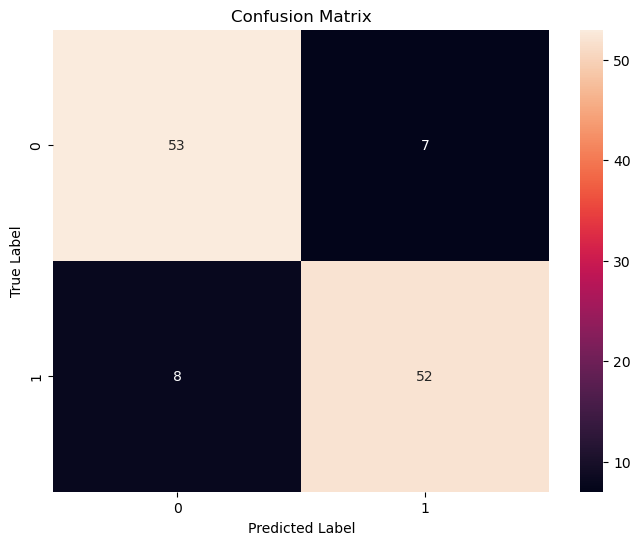

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), predicted_labels), annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()